<h1>01 - Random Mostly Sparse Matrices</h1>

In [1]:
import numpy as np

<h2>Define Distributions for s's</h2>

In [46]:
class RandomMatDist:
    def __init__(self,f,u):
        self.f = f
        self.u = u
     
    def sample(self,shape):
        @np.vectorize
        def _transform(x):
            if x < self.f:

                return (1 - self.u/2) + (self.u*x)/self.f
            if x >= self.f:

                return (-1 - self.u/2) + (self.u*(x-self.f))/(1-self.f)
        
        x = np.random.rand(*shape)
        return _transform(x)

In [47]:
import scipy.sparse as sparse

create sparse matrix as defined in eqn 1

In [48]:
def get_matrix(N,f,u,g):
    dist = RandomMatDist(f,u)
    ssss = dist.sample((N,2))
    inds = np.arange(0,N)
    mat1 = sparse.csr_matrix((ssss[:,0] * np.exp(g), (inds, (inds+1) % N)), shape=(N, N))
    mat2 = sparse.csr_matrix((ssss[:,1] *np.exp(-g), ((inds+1) % N, inds)), shape=(N, N))
    return mat1 + mat2

In [54]:
matrix = get_matrix(N=500,f=0.75,u=0.5,g=0.1)

In [55]:
import scipy.linalg

<h2>Average many Random Matrices</h2>

In [59]:
# lambs = np.array([])
# for iteration in range(10):
#     matrix = get_matrix(N=500,f=0.75,u=0.5,g=0.1)
#     temp, vecs = scipy.sparse.linalg.eigs(matrix)
#     lambs = np.concatenate((lambs,temp))

<h2>Create Fig 1</h2>

In [60]:
import matplotlib.pyplot as plt

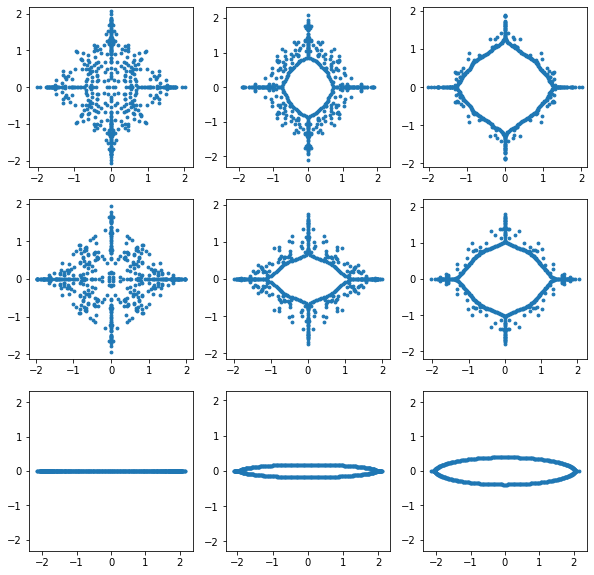

In [80]:
fs = np.array([0.5,0.75,1.0])
gs = np.array([0.0,0.1 ,0.2])
fig, axs = plt.subplots(len(fs), len(gs),figsize=(10, 10))
for i,f in enumerate(fs):
    for j,g in enumerate(gs):
        matrix = get_matrix(N=500,f=f,u=0.5,g=g)
        lambs, vecs = scipy.linalg.eig(matrix.todense())
        axs[i,j].scatter(lambs.real,lambs.imag,s=8)
        axs[i,j].axis('equal')
plt.savefig('../figures/fig1.png')
plt.show()